In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn
import csv

In [2]:
hashed = pd.read_csv('hashed_feature.csv')
tabular = pd.read_csv('tabular_data.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#### Lets see what kind of data we have and shapes of it

In [3]:
print(hashed.shape)
hashed.head()

(266053, 2)


,id,feature_50
0,0,7984b0a0e139cabadb5afc7756d473fb34d23819
1,0,47904b3331202e9881d003ff449c2eabfbc75460
2,0,a99c4b3af723874ddd85af322beea81b64437294
3,0,4dce5381031a88aed6b12ef71b6f7c3148e7b3c8
4,0,d62db721202cb6636887f450a7b77fa97db03b05


In [4]:
print(tabular.shape)
tabular

(61272, 52)


,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,1,110.0,55.0,0.432017,0.000000,176.78,0.0,0.323712,NaN,...,0.00,0,0.000000,0.0,55.0,2.0,0.526552,145.0,133.28,0.0
1,0,2,110.0,110.0,0.397517,0.000000,315.42,0.0,0.316798,NaN,...,0.00,0,0.000000,0.0,110.0,1.0,0.481063,130.0,229.97,0.0
2,0,3,110.0,55.0,0.359440,0.000000,354.55,0.0,0.339188,NaN,...,0.07,0,0.000000,0.0,55.0,1.0,0.509598,180.0,231.78,0.0
3,0,4,110.0,55.0,0.285707,0.000000,229.98,0.0,0.415428,NaN,...,0.00,0,0.000000,0.0,55.0,0.0,0.680089,142.0,183.83,0.0
4,0,5,110.0,55.0,0.101487,444.730391,307.12,0.0,0.569670,NaN,...,0.95,0,20.014485,0.0,55.0,0.0,0.776175,85.0,155.83,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61267,5105,8,110.0,77.0,NaN,0.000000,95.30,0.0,0.094381,221.85,...,-0.00,0,0.000000,0.0,75.0,0.0,0.082128,43.0,83.97,0.0
61268,5105,9,110.0,77.0,NaN,0.000000,61.87,0.0,0.105878,343.22,...,1.75,0,0.000000,0.0,75.0,0.0,0.077594,49.0,48.02,0.0
61269,5105,10,110.0,106.5,NaN,0.000000,88.05,0.0,0.040169,259.33,...,8.27,0,0.000000,0.0,99.0,1.0,0.109053,43.0,74.52,0.0
61270,5105,11,110.0,45.0,NaN,0.000000,98.40,0.0,0.040810,222.00,...,0.00,0,0.000000,0.0,0.0,0.0,0.101929,35.0,25.83,0.0


#### Explore some statistics 

In [5]:
tabular.describe()

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
count,61272.000000,61272.000000,58460.000000,58380.000000,57795.000000,58314.000000,58425.000000,58257.000000,57814.000000,58280.000000,...,58402.000000,61272.0,58389.000000,58218.000000,58428.000000,58307.000000,53036.000000,58418.000000,58368.000000,58397.000000
mean,2552.500000,6.500000,110.070493,87.142409,0.305150,3003.454276,414.703826,1466.527398,0.576053,391.127914,...,2.389240,0.0,451.453999,1.092617,70.045547,12.617404,0.420170,125.407494,288.885904,62.298690
std,1473.987237,3.452081,0.465371,95.507541,0.746314,11218.392268,524.216185,7356.174585,0.738444,436.314898,...,12.291543,0.0,2784.078472,2.989411,60.523556,22.794809,0.402705,123.970687,380.992122,341.761943
min,0.000000,1.000000,110.000000,-4.250000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,...,-234.610000,0.0,-71832.185113,0.000000,0.000000,0.000000,-0.999903,0.000000,0.000000,0.000000
25%,1276.000000,3.750000,110.000000,45.000000,0.059522,0.000000,70.320000,0.000000,0.247418,99.295000,...,0.000000,0.0,0.000000,0.000000,35.000000,1.000000,0.084032,39.000000,38.845000,0.000000
50%,2552.500000,6.500000,110.000000,75.000000,0.147504,10.898701,254.950000,0.000000,0.492813,262.430000,...,0.150000,0.0,0.000000,0.000000,61.580000,5.000000,0.412981,94.000000,168.250000,3.000000
75%,3829.000000,9.250000,110.000000,114.000000,0.321111,1809.999746,566.530000,0.000000,0.698059,535.162500,...,1.630000,0.0,17.765874,1.000000,95.000000,14.000000,0.791630,173.000000,393.807500,13.000000
max,5105.000000,12.000000,119.000000,7989.000000,5.474424,557998.502178,10335.280000,334448.528357,5.499928,7950.650000,...,1063.930000,0.0,150799.228494,31.000000,1189.000000,504.000000,0.999941,1724.000000,8201.170000,2452.540251


In [6]:
tabular['feature_25'] = tabular['feature_25'].astype('category').cat.codes

#### For example in feature_41 we have only 0 values. So we can remove this column because it doesn't give us any information

In [7]:
print(train_data.shape)
train_data.head()

(4084, 2)


,id,target
0,0,0
1,1,0
2,2,1
3,3,0
4,4,1


In [8]:
print(test_data.shape)
test_data.head()

(1022, 2)


,id,score
0,4084,NaN
1,4085,NaN
2,4086,NaN
3,4087,NaN
4,4088,NaN


#### Now we want to know how many NaN values we have and think how can we deal with it

In [9]:
tabular.isnull().sum()

id               0
period           0
feature_0     2812
feature_1     2892
feature_2     3477
feature_3     2958
feature_4     2847
feature_5     3015
feature_6     3458
feature_7     2992
feature_8     2934
feature_9     2928
feature_10    2954
feature_11    3088
feature_12    3425
feature_13    3334
feature_14    2906
feature_15    2862
feature_16    3079
feature_17       0
feature_18    3060
feature_19    3564
feature_20    2941
feature_21    2809
feature_22    2873
feature_23    3099
feature_24    2951
feature_25       0
feature_26    2668
feature_27    2899
feature_28    2998
feature_29    2462
feature_30    2815
feature_31    2918
feature_32    3002
feature_33    3778
feature_34    2885
feature_35    3017
feature_36    2827
feature_37    2863
feature_38       0
feature_39    2857
feature_40    2870
feature_41       0
feature_42    2883
feature_43    3054
feature_44    2844
feature_45    2965
feature_46    8236
feature_47    2854
feature_48    2904
feature_49    2875
dtype: int64

#### Also count of NaN values in %

In [10]:
for col in tabular.columns:
    values_missing = np.mean(tabular[col].isnull())
    print('{} - {}%'.format(col, round(values_missing*100)))

id - 0%
period - 0%
feature_0 - 5%
feature_1 - 5%
feature_2 - 6%
feature_3 - 5%
feature_4 - 5%
feature_5 - 5%
feature_6 - 6%
feature_7 - 5%
feature_8 - 5%
feature_9 - 5%
feature_10 - 5%
feature_11 - 5%
feature_12 - 6%
feature_13 - 5%
feature_14 - 5%
feature_15 - 5%
feature_16 - 5%
feature_17 - 0%
feature_18 - 5%
feature_19 - 6%
feature_20 - 5%
feature_21 - 5%
feature_22 - 5%
feature_23 - 5%
feature_24 - 5%
feature_25 - 0%
feature_26 - 4%
feature_27 - 5%
feature_28 - 5%
feature_29 - 4%
feature_30 - 5%
feature_31 - 5%
feature_32 - 5%
feature_33 - 6%
feature_34 - 5%
feature_35 - 5%
feature_36 - 5%
feature_37 - 5%
feature_38 - 0%
feature_39 - 5%
feature_40 - 5%
feature_41 - 0%
feature_42 - 5%
feature_43 - 5%
feature_44 - 5%
feature_45 - 5%
feature_46 - 13%
feature_47 - 5%
feature_48 - 5%
feature_49 - 5%


In [11]:
hashed.isnull().sum()

id              0
feature_50    404
dtype: int64

#### Try to drop all NaN values

In [12]:
tabular.dropna().shape

(21184, 52)

#### Then conclude that we can't delete all rows with NaN values because we lose a very big part of our data.
#### Lets try 2 ways of filling NaN values:
    1) fill it with 0;
    2) fill it with mean values of each column

In [13]:
X_zeros = tabular.fillna(0)
X_mean = tabular.fillna(tabular.mean(axis=0))

#### Find out if we have constant columns and if yes => can remove them

In [14]:
num_rows = len(X_mean.index)
low_information_cols = [] 
for col in X_mean.columns:
    cnts = X_mean[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.9:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))

feature_0: 92.30644%
feature_38: 95.00098%
feature_41: 100.00000%


#### Also lets group our people somehow. Try use mean for every person

In [15]:
data_zeros_period_mean = (X_zeros.groupby(X_zeros['id']).median()).drop(['period', 'feature_41', 'feature_38'], 1)
data_mean_period_mean = (X_mean.groupby(X_mean['id']).median()).drop(['period', 'feature_41', 'feature_38'], 1)

In [16]:
data_zeros_period_mean

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_39,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
id,,,,,,,,,,,,,,,,,,,,,
0,110.0,55.00,0.159587,139.271668,334.985,0.0,0.455099,0.000,144.5,0.000,...,0.000,0.275,6.049074,0.0,55.0,1.0,0.603409,143.5,230.875,0.0
1,110.0,125.00,0.048511,6345.022099,1079.125,0.0,0.374001,1089.585,124.5,0.750,...,0.000,0.535,3529.394494,0.0,125.0,6.0,0.261593,123.5,0.000,1.5
2,110.0,0.00,0.000000,0.000000,1.770,0.0,0.559836,0.000,6.0,0.000,...,0.000,0.010,0.000000,0.0,0.0,0.0,0.155935,6.0,0.910,0.0
3,0.0,0.00,0.000000,0.000000,0.000,0.0,0.000000,0.000,0.0,0.000,...,0.000,0.000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000,0.0
4,110.0,112.00,0.133514,2200.266634,351.660,0.0,0.647226,501.390,221.5,45.810,...,0.000,0.545,47.646971,0.0,100.0,34.5,0.901067,189.5,0.000,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101,110.0,86.75,0.258060,31.271050,1088.890,0.0,0.019393,1340.145,172.5,8.975,...,0.000,0.015,0.016164,0.0,85.0,12.5,0.000000,169.0,757.840,6.5
5102,110.0,85.00,0.350925,0.000000,216.315,0.0,0.765102,146.350,0.0,0.255,...,0.000,0.000,0.000000,0.0,80.0,7.5,0.475778,105.5,196.485,1.0
5103,110.0,20.50,0.391126,0.000000,152.615,0.0,0.475722,54.140,18.0,36.300,...,0.000,0.910,0.000000,0.0,20.0,4.0,0.434223,17.0,0.000,5.0


In [17]:
data_mean_period_mean

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_39,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
id,,,,,,,,,,,,,,,,,,,,,
0,110.000000,55.000000,0.159587,139.271668,334.985000,0.000000,0.455099,391.127914,144.500000,0.000000,...,0.000000,0.27500,6.049074,0.000000,55.000000,1.000000,0.603409,143.500000,230.875000,0.00000
1,110.000000,125.000000,0.048511,6345.022099,1079.125000,0.000000,0.374001,1089.585000,124.500000,0.750000,...,0.000000,0.53500,3529.394494,0.000000,125.000000,6.000000,0.363216,123.500000,288.885904,1.50000
2,110.000000,0.000000,0.305150,0.000000,1.770000,0.000000,0.559836,391.127914,6.000000,0.000000,...,0.000000,0.01000,0.000000,0.000000,0.000000,0.000000,0.213468,6.000000,0.910000,0.00000
3,110.070493,87.142409,0.305150,3003.454276,414.703826,1466.527398,0.576053,391.127914,125.101255,114.737443,...,2.864665,2.38924,451.453999,1.092617,70.045547,12.617404,0.420170,125.407494,288.885904,62.29869
4,110.000000,112.000000,0.133514,2200.266634,351.660000,0.000000,0.647226,501.390000,221.500000,45.810000,...,0.000000,0.54500,47.646971,0.000000,100.000000,34.500000,0.901067,189.500000,288.885904,18.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101,110.000000,86.750000,0.258060,31.271050,1088.890000,0.000000,0.019393,1340.145000,172.500000,8.975000,...,0.000000,0.01500,0.016164,0.000000,85.000000,12.500000,0.420170,169.000000,757.840000,6.50000
5102,110.000000,85.000000,0.350925,0.000000,216.315000,0.000000,0.765102,146.350000,125.101255,0.255000,...,0.000000,0.00000,0.000000,0.000000,80.000000,7.500000,0.475778,105.500000,196.485000,1.00000
5103,110.000000,20.500000,0.391126,0.000000,152.615000,0.000000,0.475722,54.140000,18.000000,36.300000,...,0.000000,0.91000,0.000000,0.000000,20.000000,4.000000,0.434223,17.000000,288.885904,5.00000


#### We have a very big table with categorical feature. Every hash is unique. And it is difficult to deal with it. We should encode it for example. One of the methods is One Hot Encoding. But it will create a very big amount of new features.

In [18]:
X_cat = hashed.fillna('NA', axis=0)
X_cat['feature_50'] = X_cat['feature_50'].astype('category').cat.codes
X_cat_new = X_cat.groupby(X_mean['id']).mean()
X_cat_new_cat = X_cat_new['feature_50']
X_cat_new_cat

id
0.0       2540.166667
1.0       2360.833333
2.0       1878.666667
3.0       2587.583333
4.0       2328.166667
             ...     
5101.0    2682.083333
5102.0    1752.916667
5103.0    2073.166667
5104.0    1815.833333
5105.0    2300.583333
Name: feature_50, Length: 5106, dtype: float64

In [19]:
data_mean_period_mean = data_mean_period_mean.join(X_cat_new_cat)
data_mean_period_mean

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50
id,,,,,,,,,,,,,,,,,,,,,
0,110.000000,55.000000,0.159587,139.271668,334.985000,0.000000,0.455099,391.127914,144.500000,0.000000,...,0.27500,6.049074,0.000000,55.000000,1.000000,0.603409,143.500000,230.875000,0.00000,2540.166667
1,110.000000,125.000000,0.048511,6345.022099,1079.125000,0.000000,0.374001,1089.585000,124.500000,0.750000,...,0.53500,3529.394494,0.000000,125.000000,6.000000,0.363216,123.500000,288.885904,1.50000,2360.833333
2,110.000000,0.000000,0.305150,0.000000,1.770000,0.000000,0.559836,391.127914,6.000000,0.000000,...,0.01000,0.000000,0.000000,0.000000,0.000000,0.213468,6.000000,0.910000,0.00000,1878.666667
3,110.070493,87.142409,0.305150,3003.454276,414.703826,1466.527398,0.576053,391.127914,125.101255,114.737443,...,2.38924,451.453999,1.092617,70.045547,12.617404,0.420170,125.407494,288.885904,62.29869,2587.583333
4,110.000000,112.000000,0.133514,2200.266634,351.660000,0.000000,0.647226,501.390000,221.500000,45.810000,...,0.54500,47.646971,0.000000,100.000000,34.500000,0.901067,189.500000,288.885904,18.00000,2328.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101,110.000000,86.750000,0.258060,31.271050,1088.890000,0.000000,0.019393,1340.145000,172.500000,8.975000,...,0.01500,0.016164,0.000000,85.000000,12.500000,0.420170,169.000000,757.840000,6.50000,2682.083333
5102,110.000000,85.000000,0.350925,0.000000,216.315000,0.000000,0.765102,146.350000,125.101255,0.255000,...,0.00000,0.000000,0.000000,80.000000,7.500000,0.475778,105.500000,196.485000,1.00000,1752.916667
5103,110.000000,20.500000,0.391126,0.000000,152.615000,0.000000,0.475722,54.140000,18.000000,36.300000,...,0.91000,0.000000,0.000000,20.000000,4.000000,0.434223,17.000000,288.885904,5.00000,2073.166667


#### Some statistics again

In [20]:
data_mean_period_mean.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50
count,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,...,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5.106000e+03,5106.000000,5106.000000,5106.00000,5106.000000
mean,110.036143,82.106268,0.198558,2568.267836,392.138773,1176.470369,0.478556,371.599510,133.539995,22.170095,...,1.305307,301.106028,0.861800,69.902322,11.408312,4.567357e-01,123.424106,271.522699,12.85899,2498.431780
std,0.304332,65.986423,0.153549,9211.630990,443.407099,5493.405717,0.259814,362.231598,118.517752,41.226197,...,5.689208,1461.645792,2.475974,52.823376,19.162882,3.234131e-01,112.551091,319.656096,23.21503,398.905282
min,110.000000,0.000000,0.001209,0.000000,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.828124e-07,0.000000,0.000000,0.00000,1042.583333
25%,110.000000,55.000000,0.069279,0.000000,92.078750,0.000000,0.265691,119.348750,54.000000,0.000000,...,0.000000,0.000000,0.000000,50.000000,1.500000,1.374655e-01,46.000000,53.307500,0.00000,2228.520833
50%,110.000000,75.372500,0.159596,77.756955,281.875000,0.000000,0.516572,288.000000,111.500000,4.080000,...,0.205000,0.045747,0.000000,70.000000,5.500000,4.201697e-01,102.000000,189.685000,3.00000,2496.083333
75%,110.000000,102.000000,0.305150,2337.475168,517.917500,0.000000,0.650412,492.797500,177.000000,23.353750,...,1.230000,35.932918,1.000000,85.471250,12.617404,7.589597e-01,163.375000,356.840000,13.50000,2766.458333
max,119.000000,2184.860000,0.956327,365435.117290,5877.750000,131565.084122,1.000000,3511.395000,1529.000000,606.665000,...,283.790000,38560.557029,30.500000,1169.000000,350.000000,9.989571e-01,1537.500000,4521.790000,241.50000,3891.333333


In [21]:
data_zeros_period_mean.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_39,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
count,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,...,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000
mean,104.722190,77.069229,0.179220,2398.078296,369.619371,1094.028963,0.443376,349.403375,126.487857,15.872416,...,1.268907,1.166715,276.796108,0.798374,65.833397,10.687622,0.421017,116.616334,255.622671,9.531434
std,23.248537,68.624167,0.158395,9230.030626,452.208077,5499.630799,0.280976,372.202812,122.446418,35.199395,...,13.305831,5.690671,1462.658637,2.483468,55.251688,19.343507,0.346803,115.938080,325.599791,20.325855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,40.792500,0.051250,0.000000,56.496250,0.000000,0.204243,86.431250,40.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,35.000000,1.000000,0.070273,34.500000,30.178750,0.000000
50%,110.000000,72.070000,0.126994,1.839938,235.052500,0.000000,0.462727,242.870000,98.000000,2.565000,...,0.000000,0.120000,0.000064,0.000000,60.000000,4.000000,0.369540,89.000000,153.040000,2.000000
75%,110.000000,101.990000,0.283452,1454.471968,517.537500,0.000000,0.649791,492.797500,177.000000,16.228750,...,0.000000,0.805000,9.014087,0.500000,85.295000,12.000000,0.758960,163.000000,356.075000,9.500000
max,119.000000,2184.860000,0.956327,365435.117290,5877.750000,131565.084122,1.000000,3511.395000,1529.000000,606.665000,...,471.265000,283.790000,38560.557029,30.500000,1169.000000,350.000000,0.998957,1537.500000,4521.790000,241.500000


#### Lets have a look on bar graphs of our features. And find out that we have some columns with Normal distribution but most of data don't have this kind of distribution. And we can't explain all data with one type of distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000242A033D488>,
      dtype=object)

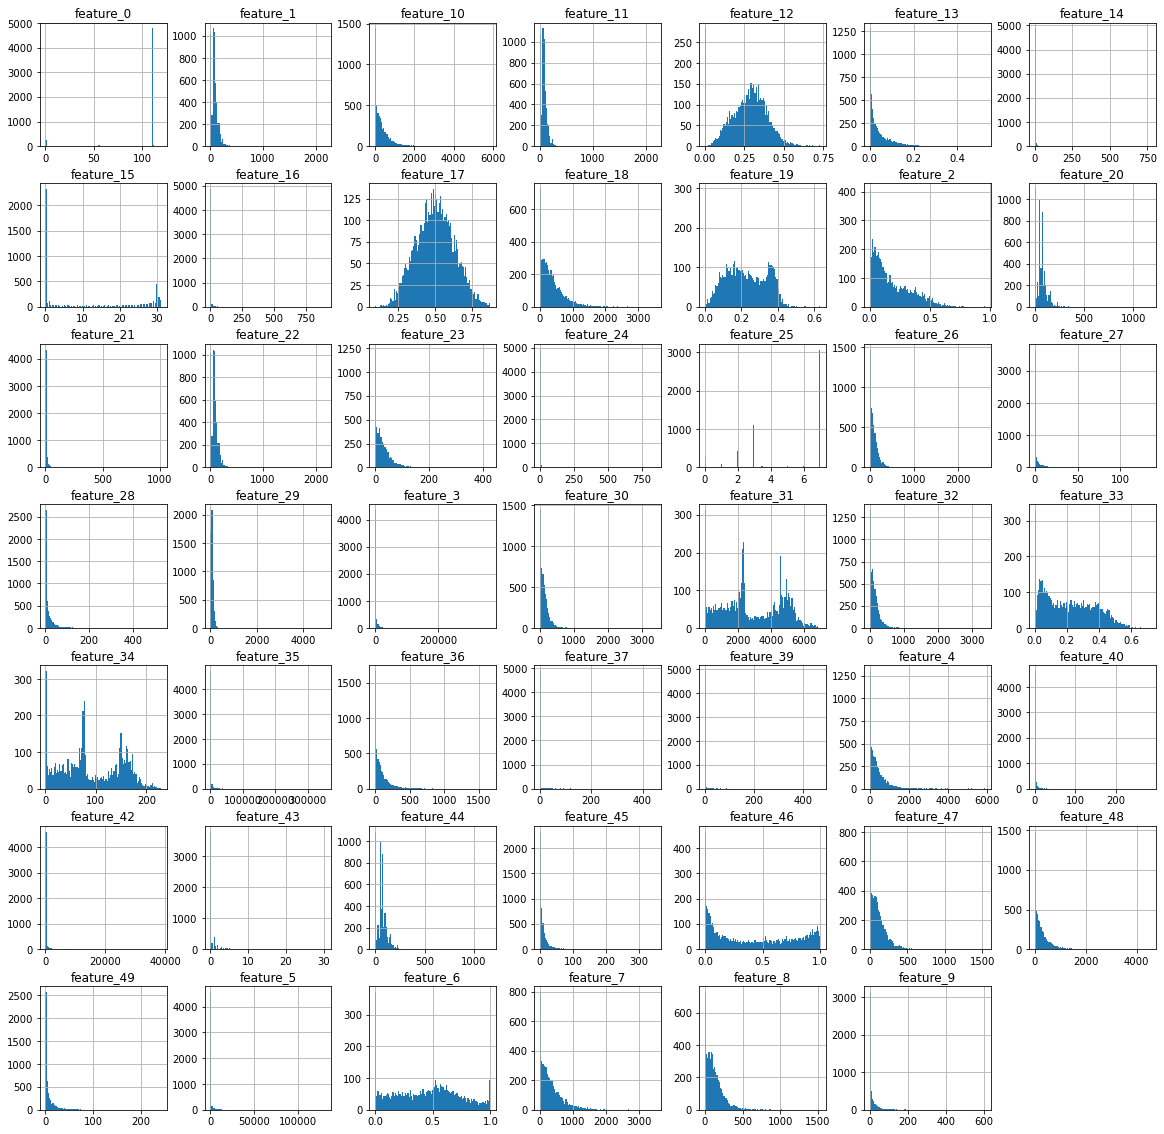

In [22]:
pd.DataFrame.hist(data_zeros_period_mean, bins=100, figsize=(20, 20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002429FEA5508>,
      dtype=object)

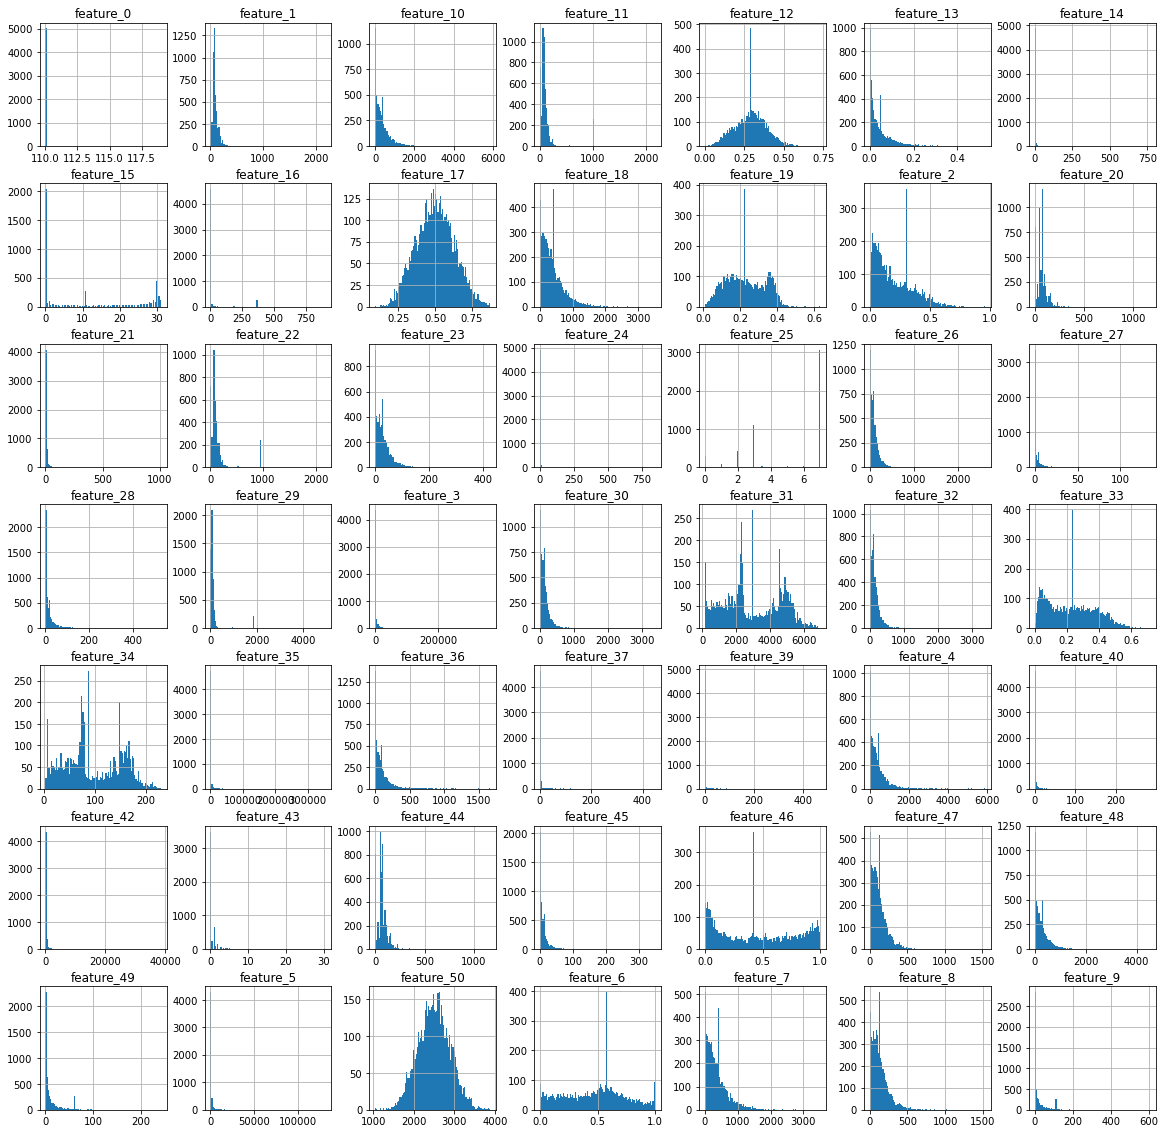

In [23]:
pd.DataFrame.hist(data_mean_period_mean, bins=100, figsize=(20, 20))

#### Calculate pair correlations. 
#### If we have a very big correlations between some features, it won't be good for future model and we should delete that features

In [24]:
corr = data_mean_period_mean.corr(method='pearson')
corr

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50
feature_0,1.000000,-0.133193,0.012880,-0.030217,-0.094161,-0.022833,0.031029,-0.102065,-0.113751,-0.042921,...,-0.021298,-0.020851,-0.036254,-0.139317,-0.062195,-0.011288,-0.113670,-0.088742,-0.043927,-0.008363
feature_1,-0.133193,1.000000,-0.239086,0.281260,0.270453,0.237435,0.173933,0.159408,0.394209,0.371013,...,0.041306,0.172168,0.388809,0.882114,0.386493,0.060351,0.349334,0.245076,0.387553,0.009535
feature_2,0.012880,-0.239086,1.000000,-0.195791,-0.072534,-0.151077,-0.427941,-0.002799,-0.295495,-0.093509,...,-0.041145,-0.140743,-0.225909,-0.223060,-0.210461,-0.127041,-0.279734,-0.065303,-0.133689,-0.021524
feature_3,-0.030217,0.281260,-0.195791,1.000000,0.057870,0.642293,0.148777,0.005017,0.102951,0.171024,...,-0.002202,0.221727,0.226932,0.320035,0.160472,0.092329,0.085212,0.046812,0.198270,0.013809
feature_4,-0.094161,0.270453,-0.072534,0.057870,1.000000,0.025443,-0.210081,0.671619,0.515008,0.197863,...,0.097805,0.084575,0.215302,0.268523,0.145906,-0.254860,0.520912,0.972833,0.166912,0.018778
feature_5,-0.022833,0.237435,-0.151077,0.642293,0.025443,1.000000,0.166799,-0.018319,0.076906,0.141613,...,-0.001918,0.215788,0.215104,0.277994,0.152374,0.109033,0.059739,0.016079,0.170886,0.000805
feature_6,0.031029,0.173933,-0.427941,0.148777,-0.210081,0.166799,1.000000,-0.360326,0.042256,0.135936,...,-0.025819,0.082280,0.140302,0.178047,0.188466,0.526474,0.017937,-0.208460,0.200466,0.012947
feature_7,-0.102065,0.159408,-0.002799,0.005017,0.671619,-0.018319,-0.360326,1.000000,0.591902,0.055650,...,0.112880,0.048379,0.137909,0.154014,0.056861,-0.350324,0.617493,0.674282,0.034610,0.024017
feature_8,-0.113751,0.394209,-0.295495,0.102951,0.515008,0.076906,0.042256,0.591902,1.000000,0.234756,...,0.105364,0.120383,0.357306,0.377062,0.410184,-0.028730,0.967025,0.509968,0.287396,0.022406
feature_9,-0.042921,0.371013,-0.093509,0.171024,0.197863,0.141613,0.135936,0.055650,0.234756,1.000000,...,0.078716,0.110979,0.356032,0.340750,0.576953,0.010447,0.155920,0.137778,0.796334,-0.014626


#### Write a function that remove columns with a correlation higher than treshhold

In [25]:
def drop_high_corr(data, treshhold):
    corr_matrix = data.corr().abs()
    high_corr_var = np.where(abs(corr_matrix)>treshhold)
    high_corr_var = [(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
    drop_features = []
    for i in high_corr_var:
        drop_features.append(i[0])
    drop_features = list(set(drop_features))
    print(drop_features)
    data = data.drop(drop_features, 1)
    return data

In [26]:
data_mean_period_mean_new = drop_high_corr(data_mean_period_mean, 0.85)
data_zeros_period_mean_new = drop_high_corr(data_zeros_period_mean, 0.85)

['feature_4', 'feature_19', 'feature_14', 'feature_26', 'feature_30', 'feature_10', 'feature_36', 'feature_8', 'feature_1', 'feature_7', 'feature_31', 'feature_23', 'feature_20']
['feature_16', 'feature_4', 'feature_11', 'feature_14', 'feature_9', 'feature_22', 'feature_26', 'feature_30', 'feature_10', 'feature_36', 'feature_8', 'feature_1', 'feature_7', 'feature_31', 'feature_23', 'feature_20']


#### Have a look on some pairplots of our data

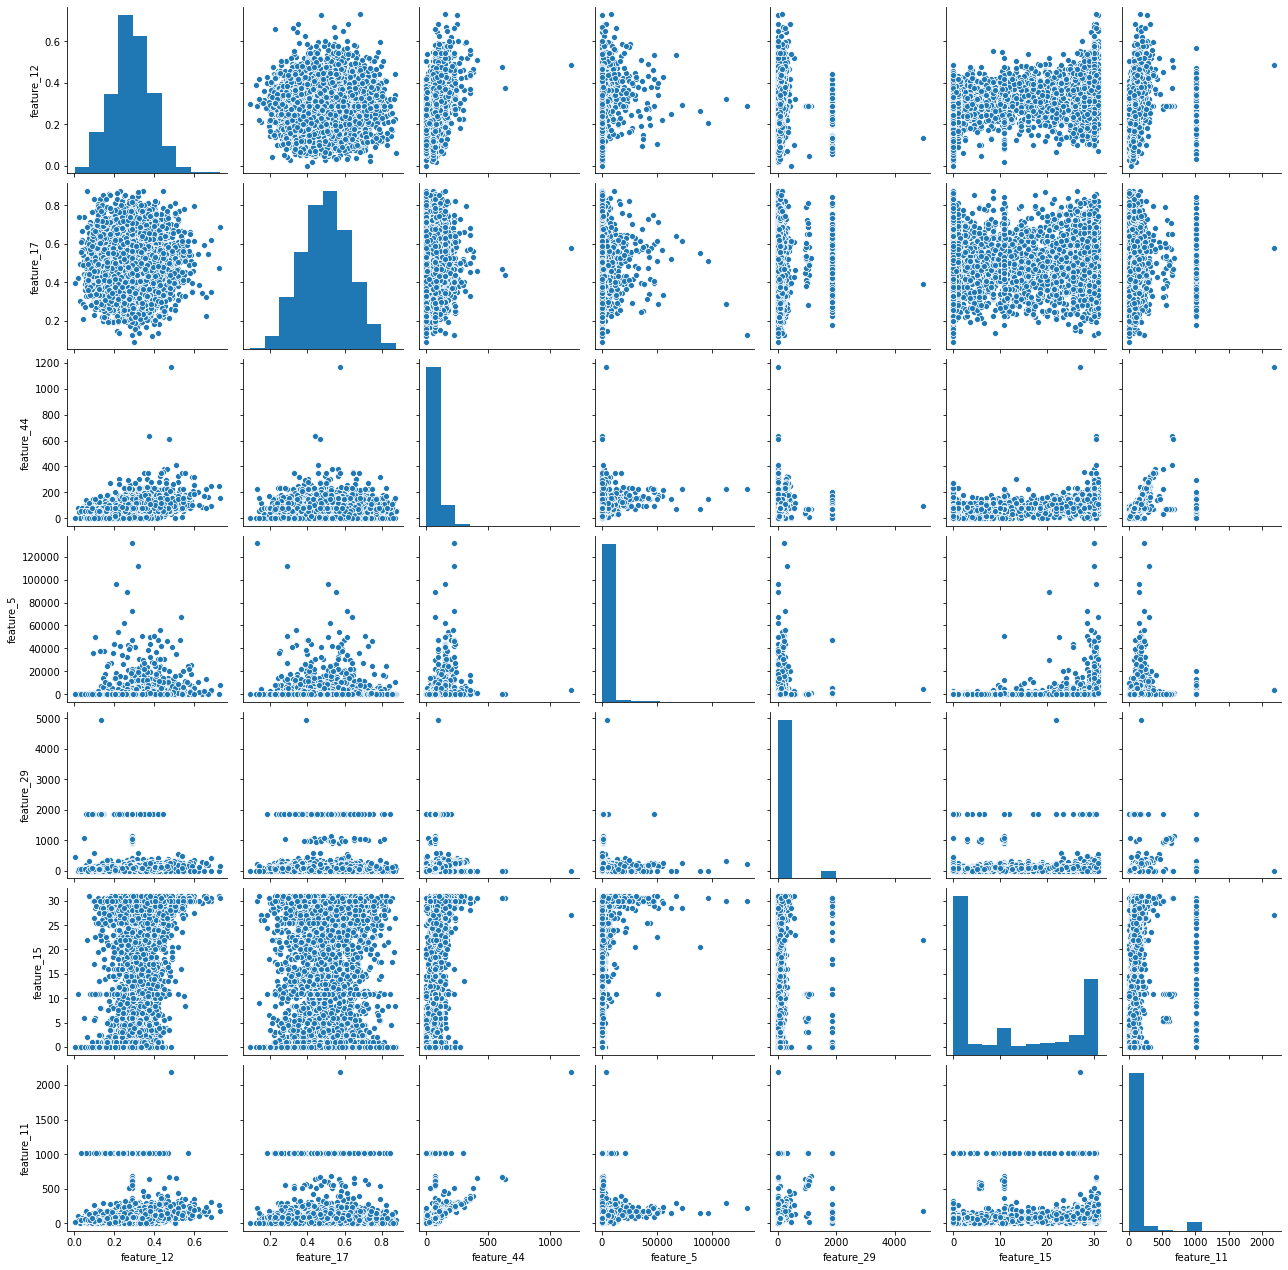

In [27]:
columns = ['feature_12', 'feature_17', 'feature_44', 'feature_5', 'feature_29', 'feature_15', 'feature_11']
seaborn.pairplot(data_mean_period_mean_new[columns])

#### Since we don't have test targets for our data, we can't find out what the model will suit better. So lets divide our data with known targets into train and test data and then find roc_auc score for each model and compare them. And finally choose the best one and implement it to our real test data

In [28]:
y = train_data['target']
X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(data_zeros_period_mean[:4084], y, test_size=0.2, random_state=0)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(data_mean_period_mean_new[:4084], y, test_size=0.2, random_state=0)

#### As we saw in statistics we have a very different scale of numbers in each column => should transform data. For this task we will use StandardScaler: it standardizes features by removing the mean and scaling to unit variance

In [29]:
def scalaring(X_train, X_test, y_train):
    scaler = StandardScaler()
    scaler.fit(X_train, y_train)
    X_train_sc = scaler.transform(X_train)
    X_test_sc = scaler.transform(X_test)
    return X_train_sc, X_test_sc

In [30]:
X_train_sc_z, X_test_sc_z = scalaring(X_train_z, X_test_z, y_train_z)
X_train_sc_m, X_test_sc_m = scalaring(X_train_m, X_test_m, y_train_m)

#### Finally move to our models. We deal with the binary classification problem. In python we have some implemented classifiers. Lets try three common algorithms: logistic regression, random forest classifier and knn classifier 

In [31]:
def prediction_log_reg(X_test, y_test, X_train, y_train): # try l1 and default l2 penalties
    model_l1 = LogisticRegression(penalty='l1', solver='liblinear',random_state=0)
    model_l2 = LogisticRegression(random_state=0)
    model_l1.fit(X_train, y_train)
    model_l2.fit(X_train, y_train)
    pred_l1 = model_l1.predict_proba(X_test)[:, 1]
    pred_l2 = model_l2.predict_proba(X_test)[:, 1]
    score_l1 = roc_auc_score(y_test, pred_l1)
    score_l2 = roc_auc_score(y_test, pred_l2)
    print('score_l1:', score_l1)
    print('score_l2:', score_l2)
    return score_l1, score_l2

In [32]:
print('results for na=0: ')
prediction_log_reg(X_test_sc_z, y_test_z, X_train_sc_z, y_train_z)
print('results for na=mean: ')
prediction_log_reg(X_test_sc_m, y_test_m, X_train_sc_m, y_train_m)

results for na=0: 
score_l1: 0.7554112554112554
score_l2: 0.7546843703560122
results for na=mean: 
score_l1: 0.7585449376494153
score_l2: 0.7579149706015378


(0.7585449376494153, 0.7579149706015378)

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
clf = MLPClassifier(solver='sgd', max_iter=70, hidden_layer_sizes=(50, 50), activation='identity', 
                    verbose=True, random_state=0).fit(X_train_sc_m, y_train_m)

Iteration 1, loss = 0.83449889
Iteration 2, loss = 0.70393394
Iteration 3, loss = 0.62868217
Iteration 4, loss = 0.58640282
Iteration 5, loss = 0.56164514
Iteration 6, loss = 0.54674409
Iteration 7, loss = 0.53701627
Iteration 8, loss = 0.52958621
Iteration 9, loss = 0.52467922
Iteration 10, loss = 0.52062786
Iteration 11, loss = 0.51756016
Iteration 12, loss = 0.51511395
Iteration 13, loss = 0.51303745
Iteration 14, loss = 0.51101158
Iteration 15, loss = 0.50950419
Iteration 16, loss = 0.50790191
Iteration 17, loss = 0.50670124
Iteration 18, loss = 0.50560516
Iteration 19, loss = 0.50490265
Iteration 20, loss = 0.50377362
Iteration 21, loss = 0.50313714
Iteration 22, loss = 0.50249877
Iteration 23, loss = 0.50172503
Iteration 24, loss = 0.50131632
Iteration 25, loss = 0.50114405
Iteration 26, loss = 0.50039805
Iteration 27, loss = 0.50010912
Iteration 28, loss = 0.49957138
Iteration 29, loss = 0.49936065
Iteration 30, loss = 0.49907538
Iteration 31, loss = 0.49876457
Iteration 32, los

In [35]:
clf.score(X_test_sc_m, y_test_m)

0.7674418604651163

In [36]:
pred_mlp = clf.predict_proba(X_test_sc_m)[:, 1]
roc_auc_score(y_test_m, pred_mlp)

0.7599179427537637

#### We see that with replacing NaN values with mean we have better results that when we use 0

In [37]:
def prediction_knn(X_test, y_test, X_train, y_train):
    knn = KNeighborsClassifier(n_neighbors=250)
    knn.fit(X_train, y_train)
    pred_knn = knn.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, pred_knn)
    print('score_knn:', score)

In [38]:
print('results for na=0: ')
prediction_knn(X_test_sc_z, y_test_z, X_train_sc_z, y_train_z)
print('results for na=mean: ')
prediction_knn(X_test_sc_m, y_test_m, X_train_sc_m, y_train_m)

results for na=0: 
score_knn: 0.7332856819797119
results for na=mean: 
score_knn: 0.7423394391677973


In [39]:
def predictions_forest(X_test, y_test, X_train, y_train):
    clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='auto', oob_score=False, n_jobs=12, min_samples_leaf=5, random_state=0)
    clf.fit(X_train, y_train)
    pred = clf.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, pred)
    print(f'score for random forest: {score}')
    return score

In [40]:
print('results for na=0: ')
predictions_forest(X_test_sc_z, y_test_z, X_train_sc_z, y_train_z)
print('results for na=mean: ')
predictions_forest(X_test_sc_m, y_test_m, X_train_sc_m, y_train_m)

results for na=0: 
score for random forest: 0.7354380693932934
results for na=mean: 
score for random forest: 0.7354622988951347


0.7354622988951347

#### As a result MLP classifier has the best score with identity function and sgd solver. And also replacin NaN values woth mean values of each table turned out better than replacing with 0 values. So in answer we will use this classifier and replacing NaN with mean values